In [1]:
from analysis import Protein

/home/ricard/miniforge3/envs/mda_workshop/lib/python3.11/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
tpr = "1el3_out/prod_prot.tpr"
xtc = "1el3_out/trajout.xtc"
gro = "1el3_out/trajout.gro"
protein = Protein(gro,xtc, "resid 1-315")

residues = protein.protein.residues.resids

protein.align_prot("resid 2-315")

print(residues)

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

/home/ricard/miniforge3/envs/mda_workshop/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [3]:
xtc = "aligned_prot.xtc"
gro = "aligned_prot.gro"

protein = Protein(gro,xtc, "resid 1-315")

residues = protein.protein.residues.resids

rmsd = protein.get_rmsd("resid 2-315")
print(rmsd)



resid 2-315 None
       frame      time  full_rmsd
0        0.0       0.0   0.000001
1        1.0     100.0   1.199797
2        2.0     200.0   1.357439
3        3.0     300.0   1.347701
4        4.0     400.0   1.420938
...      ...       ...        ...
1995  1995.0  199500.0   3.007058
1996  1996.0  199600.0   2.976778
1997  1997.0  199700.0   2.971810
1998  1998.0  199800.0   3.096541
1999  1999.0  199900.0   3.094933

[2000 rows x 3 columns]


Text(0.5, 1.0, 'RMSD for the full simulation')

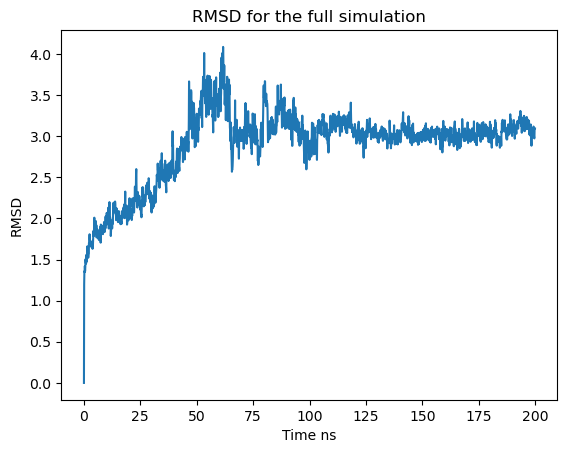

In [4]:
import matplotlib.pyplot as plt

plt.plot(rmsd["time"]/1000, rmsd["full_rmsd"])
plt.xlabel("Time ns")
plt.ylabel("RMSD")
plt.title("RMSD for the full simulation")

In [5]:
pdb = "1el3.pdb"
protein_pdb = Protein(pdb,pdb,"protein")
residues = protein_pdb.protein.residues.resids
print(residues)


[  1   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [6]:
import MDAnalysis as mda

promising_pockets = [1,2,7,8,13]

pocket_resids = {}
for pocket in promising_pockets:
    pdb = f"1el3_out/pockets/pocket{pocket}_atm.pdb"
    u = mda.Universe(pdb)
    residues_atoms = u.select_atoms("protein")
    pocket_resids[pocket] = residues_atoms.residues.resids
print(pocket_resids)


{1: array([219, 301, 221, 219, 262, 216, 268, 216, 295, 296, 224,  20,  79,
        20, 216, 215, 216, 122,  47, 219, 218, 121, 214,  21, 214, 216,
       262, 301, 265, 264, 219,  49, 219, 224, 221, 219, 122, 262, 215,
       264, 262, 217, 295, 215, 262, 209, 110, 159, 160, 183, 301,  48,
       209,  20, 209, 210, 214, 228, 268, 302, 300, 302,  20, 298,  20,
       209, 111, 268, 263, 219, 300, 111, 212, 268, 245, 212, 211,  43,
        20, 210,  48, 210, 263, 298,  79,  47, 272, 228, 271, 209, 260,
        18,  19, 300, 298, 219, 299, 245, 244, 243, 268, 271, 268, 212,
       209, 263, 260, 297, 299]), 2: array([160, 184, 311, 160, 313, 296, 315, 310, 161, 192, 195, 311, 192,
       296, 185, 315, 162]), 7: array([  7, 178,   7,  10,   9, 154, 178, 176, 177,   8, 154, 178,  10,
       154,   8, 177, 148,   7, 177, 178,   9, 155, 154, 178, 155, 156,
         8, 180]), 8: array([  3, 256,   1,   4,   1,   1, 256, 253, 256,  14,   4, 257, 256,
        14, 256]), 13: array([279, 250, 2

In [7]:
subgroups = []
subgroups_names = []
for pocket in pocket_resids:
    resids = pocket_resids[pocket]
    resid_string = " ".join(map(str, resids))
    subgroups.append(f"resid {resid_string}")
    subgroups_names.append(f"Pocket {pocket}")

group_rmsd = protein.get_rmsd("resid 2-315", subgroups=subgroups)
print(f"There are {len(subgroups)} subgroups")
print(group_rmsd)

resid 2-315 ['resid 219 301 221 219 262 216 268 216 295 296 224 20 79 20 216 215 216 122 47 219 218 121 214 21 214 216 262 301 265 264 219 49 219 224 221 219 122 262 215 264 262 217 295 215 262 209 110 159 160 183 301 48 209 20 209 210 214 228 268 302 300 302 20 298 20 209 111 268 263 219 300 111 212 268 245 212 211 43 20 210 48 210 263 298 79 47 272 228 271 209 260 18 19 300 298 219 299 245 244 243 268 271 268 212 209 263 260 297 299', 'resid 160 184 311 160 313 296 315 310 161 192 195 311 192 296 185 315 162', 'resid 7 178 7 10 9 154 178 176 177 8 154 178 10 154 8 177 148 7 177 178 9 155 154 178 155 156 8 180', 'resid 3 256 1 4 1 1 256 253 256 14 4 257 256 14 256', 'resid 279 250 278 279 276 1 278 277 278 277 279', 'resid 2-315']
There are 6 subgroups
       frame      time  full_rmsd    group0    group1    group2    group3  \
0        0.0       0.0   0.000001  0.000000  0.000000  0.000000  0.000000   
1        1.0     100.0   1.199797  1.177252  1.091776  1.231811  1.101302   
2    

['Pocket 1', 'Pocket 2', 'Pocket 7', 'Pocket 8', 'Pocket 13']


Text(0.5, 0, 'RMSD')

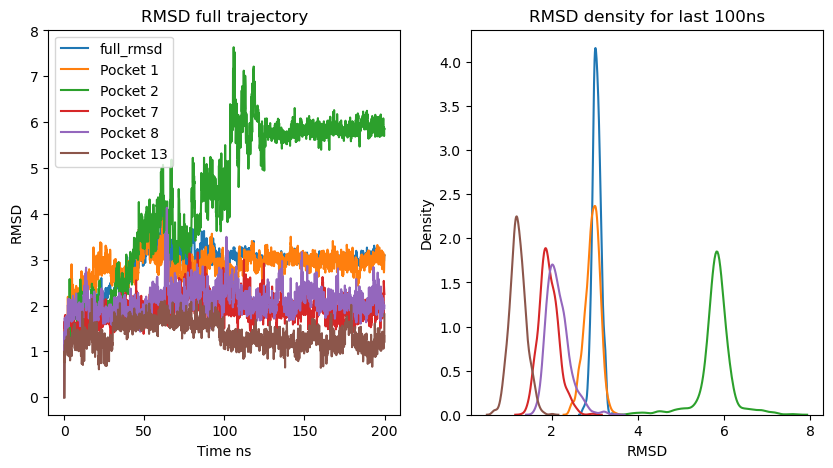

In [8]:
import seaborn as sns
columns = group_rmsd.columns
print(subgroups_names)


fig,ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(group_rmsd["time"]/1000, group_rmsd[columns[-len(subgroups_names)-2]], label = "full_rmsd")
sns.kdeplot(group_rmsd[columns[-len(subgroups_names)-2]].iloc[1000:], ax = ax[1])
columns = columns[-len(subgroups_names)-1:]
for column, pocket_name in zip(columns,subgroups_names):
    ax[0].plot(group_rmsd["time"]/1000, group_rmsd[column], label = pocket_name)
    sns.kdeplot(group_rmsd[column].iloc[1000:], ax = ax[1])

ax[0].legend()

ax[0].set_xlabel("Time ns")
ax[0].set_ylabel("RMSD")
ax[0].set_title("RMSD full trajectory")
ax[1].set_title("RMSD density for last 100ns")
ax[1].set_xlabel("RMSD")




In [10]:
rmsf = protein.get_rmsf("resid 2-315 and name CA")
print(rmsf)

     resnum      rmsf
0         2  1.582304
1         3  0.918869
2         4  0.721191
3         5  0.854358
4         6  0.769719
..      ...       ...
309     311  4.138188
310     312  4.138799
311     313  4.358829
312     314  5.648887
313     315  7.014730

[314 rows x 2 columns]


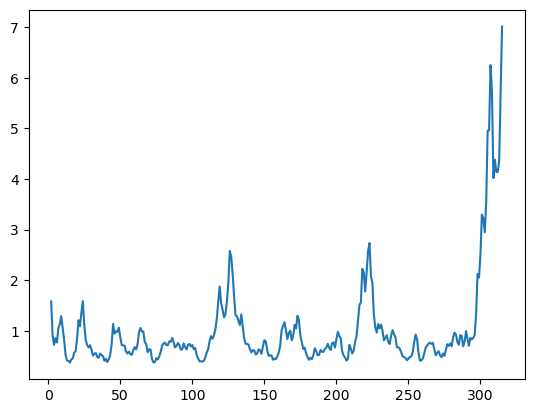

In [11]:
plt.plot(rmsf["resnum"], rmsf["rmsf"])



In [16]:
def condense_residues(residues):
    if not residues:
        return []
    
    # Sort and remove duplicates
    sorted_residues = sorted(list(set(residues)))
    condensed = []
    start = sorted_residues[0]
    end = start
    
    for num in sorted_residues[1:]:
        if num == end + 1:
            end = num  # Extend the current range
        else:
            # Add the current range/single residue
            if start == end:
                condensed.append((start, start))
            else:
                condensed.append((start,end))
            start = num
            end = num
    
    # Add the last range/single residue
    if start == end:
        condensed.append((start, start))
    else:
        condensed.append((start,end))
    
    return condensed


[(18, 21), (43, 43), (47, 49), (79, 79), (110, 111), (121, 122), (159, 160), (183, 183), (209, 212), (214, 219), (221, 221), (224, 224), (228, 228), (243, 245), (260, 260), (262, 265), (268, 268), (271, 272), (295, 302)]
[(160, 162), (184, 185), (192, 192), (195, 195), (296, 296), (310, 311), (313, 313), (315, 315)]
[(7, 10), (148, 148), (154, 156), (176, 178), (180, 180)]
[(1, 1), (3, 4), (14, 14), (253, 253), (256, 257)]
[(1, 1), (250, 250), (276, 279)]


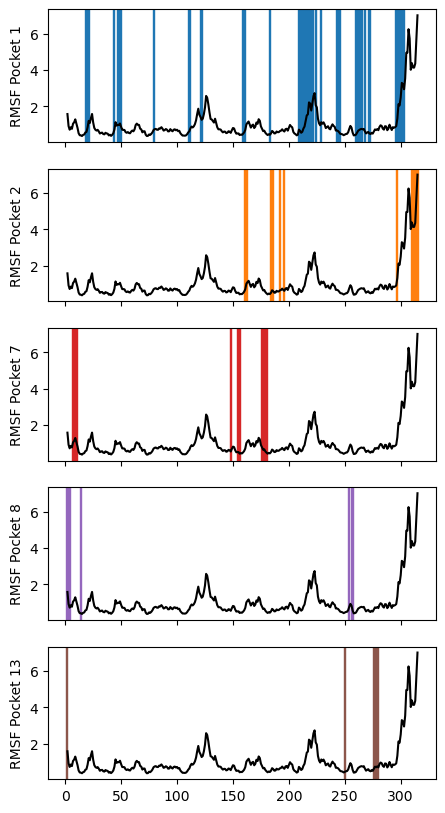

In [30]:
color_map = {1:"tab:blue", 2: "tab:orange", 7:"tab:red", 8: "tab:purple", 13:"tab:brown"}
fig, ax = plt.subplots(5,1, figsize = (5,10), sharex=True, sharey = True)

count = 0
for pocket in pocket_resids:
    resid_cond = condense_residues(list(pocket_resids[pocket]))
    print(resid_cond)
    ax[count].plot(rmsf["resnum"], rmsf["rmsf"], color = "black")
    for resid in resid_cond:
        ax[count].axvspan(resid[0]-0.5, resid[1]+0.5, color = color_map[pocket])
    ax[count].set_ylabel(f"RMSF Pocket {pocket}")
    
    count += 1

In [ ]:
import pandas as pd
sasa = open("sasa.xvg")
lines = sasa.readlines()

data_sasa = []
for line in lines:
    if line.startswith("@") or line.startswith("#"):
        pass
    else:
        data_sasa.append(line.split())

data_sasa = pd.DataFrame(data_sasa, columns = ["Time", "Total", "Pocket 1", "Pocket 2",
                                               "Pocket 7", "Pocket 8", "Pocket 13"])

columns = data_sasa.columns

for column in columns:
    data_sasa[column] = data_sasa[column].astype(float)




print(data_sasa)

          Time    Total  Pocket 1  Pocket 2  Pocket 7  Pocket 8  Pocket 13
0          0.0  136.552    18.635     2.594     6.413     3.186      3.972
1        100.0  141.204    19.959     3.098     7.225     2.841      3.766
2        200.0  141.119    18.675     3.226     6.709     2.600      3.795
3        300.0  143.994    20.446     3.094     7.191     3.234      3.780
4        400.0  144.253    19.195     3.231     7.250     2.957      4.000
...        ...      ...       ...       ...       ...       ...        ...
1996  199600.0  147.261    18.322     4.324     7.223     3.045      4.099
1997  199700.0  146.752    19.254     4.697     6.342     2.575      3.872
1998  199800.0  145.748    17.860     4.878     7.555     2.930      3.988
1999  199900.0  144.406    18.382     4.553     6.920     2.634      3.982
2000  200000.0  145.748    19.018     4.311     7.072     3.262      3.785

[2001 rows x 7 columns]


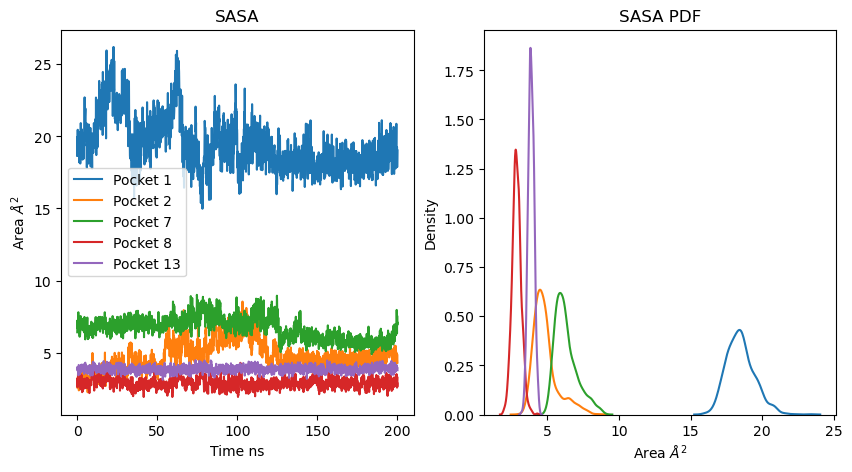

In [45]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

for column in columns[2:]:
    ax[0].plot(data_sasa[columns[0]]/1000, data_sasa[column], label = column)
    sns.kdeplot(data_sasa[column].iloc[-1000:], label = column)
ax[0].set_xlabel("Time ns")
ax[0].set_ylabel("Area $\AA^2$")
ax[0].set_title("SASA")
ax[1].set_title("SASA PDF")
ax[1].set_xlabel("Area $\AA^2$")


ax[0].legend()